In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
## importing project data 

data = pd.read_csv('kc_house_data.csv') 

## Limpeza dos dados 
### 1 - Removendo ID's Duplicados , pois não existe dois imóveis com mesmo ID

In [3]:
### verificando se existe ID's duplicados 

data['id'].value_counts().head(10)

795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
1954420170    2
6381500170    2
7167000040    2
9407110710    2
1000102       2
Name: id, dtype: int64

In [4]:
 ### Removendo os ID's repetidos

data['id'].nunique() 

data.drop_duplicates(subset= ['id'], inplace= True, keep= 'first')

data['id'].value_counts().head(10)


7129300520    1
8929000230    1
9543000205    1
8137500730    1
104500730     1
7575610760    1
629800540     1
7215730120    1
2064800610    1
3577300040    1
Name: id, dtype: int64

### Verificando a ocorrência de dados nulos 

In [5]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Verficando outliers da base de dados

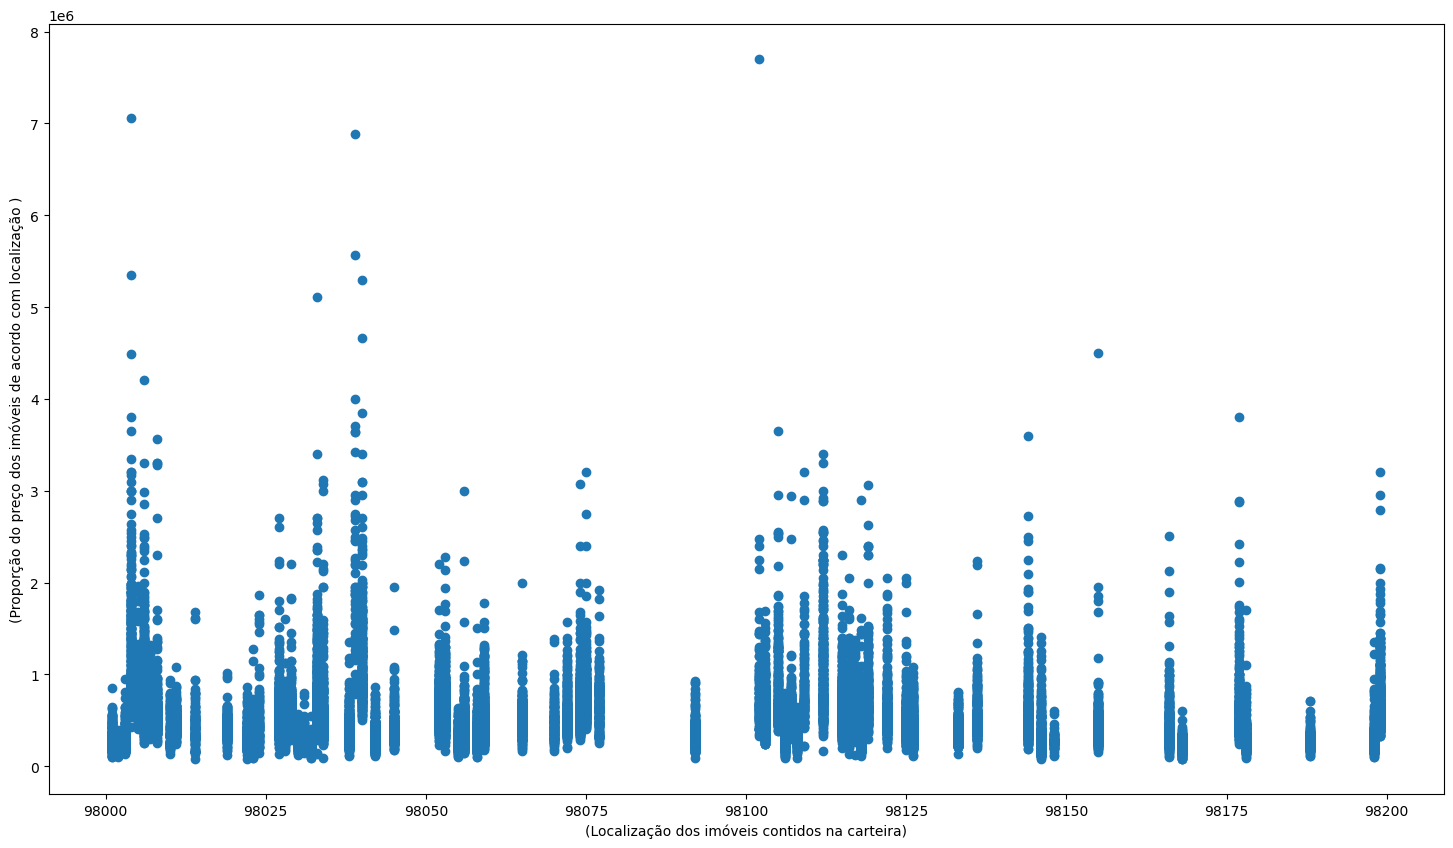

In [6]:
### Gráfico de dipersão
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(data['zipcode'], data['price'])
 
# x-axis label
ax.set_xlabel('(Localização dos imóveis contidos na carteira)')
 
# y-axis label
ax.set_ylabel('(Proporção do preço dos imóveis de acordo com localização )')
plt.show() 

In [7]:
## transformando a tipagem dos dados do tipo object para date
data['date'] = pd.to_datetime(data['date'])

#data['date'] = data['date'].dt.strftime('%m/%d/%Y')


### Adicionando novas colunas no dataframe 

In [8]:
## adicionando novas colunas que contem datas
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['week_of_year'] = data['date'].dt.isocalendar().week

## elimando o zero da coluna de anos de reforma 

data['yr_renovated'] = data['yr_renovated'].apply(lambda x: 1900 if x == 0 else x)


data.loc[:, 'yr_renovated'].unique()

array([1900, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944], dtype=int64)

In [9]:
data['living_m2'] = data['sqft_living'].apply(lambda x: x*0.09290304)
data['lot_m2'] = data['sqft_lot'].apply(lambda x: x*0.09290304)
data['m2_basement_m2'] = data['sqft_basement'].apply(lambda x: x*0.09290304)
data['m2_above_m2'] = data['sqft_above'].apply(lambda x: x*0.09290304)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21436 entries, 0 to 21612
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              21436 non-null  int64         
 1   date            21436 non-null  datetime64[ns]
 2   price           21436 non-null  float64       
 3   bedrooms        21436 non-null  int64         
 4   bathrooms       21436 non-null  float64       
 5   sqft_living     21436 non-null  int64         
 6   sqft_lot        21436 non-null  int64         
 7   floors          21436 non-null  float64       
 8   waterfront      21436 non-null  int64         
 9   view            21436 non-null  int64         
 10  condition       21436 non-null  int64         
 11  grade           21436 non-null  int64         
 12  sqft_above      21436 non-null  int64         
 13  sqft_basement   21436 non-null  int64         
 14  yr_built        21436 non-null  int64         
 15  yr

## Solucionando o problema de Quais casas a House Rocket deveria comprar e por qual preço de compra?

In [11]:
df1 = data[['zipcode', 'price']].groupby('zipcode').median().reset_index()

df1.head()

,zipcode,price
0,98001,260000.0
1,98002,235000.0
2,98003,266500.0
3,98004,1150000.0
4,98005,765475.0


In [12]:
df2 = pd.merge(data, df1 , on = 'zipcode', how = 'inner')

df3 = df2.rename(columns= {'price_x': 'price', 'price_y': 'price_median'})

df3.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'month', 'day',
       'week_of_year', 'living_m2', 'lot_m2', 'm2_basement_m2', 'm2_above_m2',
       'price_median'],
      dtype='object')

In [13]:
df3['status'] = ''

for iten in range(len(df3)): 

    if (df3.loc[iten, 'price'] <= 500000) & (df3.loc[iten , 'condition'] >= 3):
	    df3.loc[iten, 'status'] = 'buy'
    else: 
        df3.loc[iten, 'status'] = 'not_buy'


In [14]:
real_estate_purchase = df3[['id', 'zipcode', 'price', 'price_median', 'condition', 'status']].copy()

real_estate_purchase.head()

,id,zipcode,price,price_median,condition,status
0,7129300520,98178,221900.0,279000.0,3,buy
1,4060000240,98178,205425.0,279000.0,4,buy
2,4058801670,98178,445000.0,279000.0,3,buy
3,2976800796,98178,236000.0,279000.0,3,buy
4,6874200960,98178,170000.0,279000.0,3,buy


### Entregando a solução para CEO de quais imóveis tem que comprar

In [15]:
real_estate_purchase.to_csv('purchase_suggestion.csv')

In [16]:
profit = df3[['price','price_median']].loc[df3['status'] == 'buy']
profit['profit'] = profit[['price','price_median']].apply(lambda x: x['price_median'] - x['price'] , axis = 1)
print('Lucro com as vendas dos imóveis foi de  {} milhões de reais'.format(float(profit['profit'].sum())/1000000))

Lucro com as vendas dos imóveis foi de  582.0745385 milhões de reais


## Solucionando segundo problema de negócio Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?

### Processo para solução do problema 
- Agrupar os imóveis por regiões (zipcode) e por estacoes do ano 
- Calcular a mediana do preço por região e por estacoes do ano 
- Aplicar regra para condicões de venda:

        
    Se o preço da compra for maior que a mediana da região + sazonalidade
        
        O preço da venda será igual ao preço da compra + 10%
    
    Se o preço da compra for menor que a mediana da região + sazonalidade

        O preço da venda será igual ao preço da compra + 30%

### Criando novas colunas para classificar os imóveis e ajudar na Análise Exploratória de Dados

In [17]:
df3['date'] = pd.to_datetime(df3['date']).dt.strftime('%Y-%m-%d')
df3['seasons'] = pd.to_datetime(df3['date']).dt.strftime('%m-%d').apply(lambda x:
                                                                        'Spring' if '03-21' <= x < '06-21'
                                                                        else 'Summer' if '06-21' <= x < '09-21'                                                   
                                                                        else 'Autunm' if '09-21' <= x < '11-21'
                                                                        else 'Winter' )

#df3['yr_renovated'] = pd.to_datetime(df3['yr_renovated'])
#df3['yr_renovated'] = df3['yr_renovated'].apply(lambda x: pd.to_datetime('1900', format = '%Y') if x == 0 else pd.to_datetime(x, format= "%Y")).dt.strftime('%Y').astype(int)
#


df3['house_age'] = np.where(df3['yr_built'] > 2010, 'new', 'old')




df3['yr_renovated'].unique()



array([1900, 1983, 2005, 1989, 1991, 2015, 2014, 1992, 2008, 2007, 2013,
       1990, 2002, 2010, 1955, 1984, 1996, 2003, 1958, 1982, 1965, 1964,
       1960, 2004, 1976, 1988, 1986, 1979, 1948, 1970, 1999, 1998, 1963,
       1944, 1993, 1980, 2009, 1997, 1987, 2011, 1985, 1945, 1953, 2001,
       1971, 1969, 1957, 1946, 1981, 2000, 1994, 1974, 1972, 1940, 1973,
       2006, 1975, 1978, 2012, 1968, 1995, 1977, 1959, 1967, 1956, 1934,
       1962, 1951, 1950, 1954], dtype=int64)

In [18]:
df3.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,day,week_of_year,living_m2,lot_m2,m2_basement_m2,m2_above_m2,price_median,status,seasons,house_age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,13,42,109.625587,524.902176,0.000000,109.625587,279000.0,buy,Autunm,old
1,4060000240,2014-06-23,205425.0,2,1.00,880,6780,1.0,0,0,...,23,26,81.754675,629.882611,0.000000,81.754675,279000.0,buy,Summer,old
2,4058801670,2014-07-17,445000.0,3,2.25,2100,8201,1.0,0,2,...,17,29,195.096384,761.897831,44.593459,150.502925,279000.0,buy,Summer,old
3,2976800796,2014-09-25,236000.0,3,1.00,1300,5898,1.0,0,0,...,25,39,120.773952,547.942130,0.000000,120.773952,279000.0,buy,Autunm,old
4,6874200960,2015-02-27,170000.0,2,1.00,860,5265,1.0,0,0,...,27,9,79.896614,489.134506,0.000000,79.896614,279000.0,buy,Winter,old
5,4268200055,2015-05-01,245000.0,3,1.75,1740,11547,1.0,0,0,...,1,18,161.651290,1072.751403,0.000000,161.651290,279000.0,buy,Spring,old
6,3969300030,2014-07-23,165000.0,4,1.00,1000,7134,1.0,0,0,...,23,30,92.903040,662.770287,0.000000,92.903040,279000.0,buy,Summer,old
7,1678400105,2015-02-12,339000.0,4,1.50,2390,7480,1.5,0,2,...,12,7,222.038266,694.914739,0.000000,222.038266,279000.0,buy,Winter,old
8,2172000075,2014-06-23,290900.0,2,2.00,1610,17600,2.0,0,0,...,23,26,149.573894,1635.093504,0.000000,149.573894,279000.0,buy,Summer,old
9,1180003090,2014-09-06,190000.0,2,1.00,630,6000,1.0,0,0,...,6,36,58.528915,557.418240,0.000000,58.528915,279000.0,buy,Summer,old


In [19]:
### Agrupando zipcode , seansons , price  para determinar o preço por temporada

df3['seasons'].astype(str)


sell = df3[['zipcode', 'seasons', 'price']].groupby(['zipcode', 'seasons']).median().reset_index()
sell.columns = ['zipcode', 'seasons', 'price_by_season']

df4 = pd.merge(df3, sell, on = ['zipcode', 'seasons'], how = 'inner')

df4.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,week_of_year,living_m2,lot_m2,m2_basement_m2,m2_above_m2,price_median,status,seasons,house_age,price_by_season
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,42,109.625587,524.902176,0.000000,109.625587,279000.0,buy,Autunm,old,283500.0
1,2976800796,2014-09-25,236000.0,3,1.00,1300,5898,1.0,0,0,...,39,120.773952,547.942130,0.000000,120.773952,279000.0,buy,Autunm,old,283500.0
2,1180002378,2014-09-26,299000.0,4,2.50,1950,3000,2.0,0,0,...,39,181.160928,278.709120,0.000000,181.160928,279000.0,buy,Autunm,old,283500.0
3,179000350,2014-11-05,194000.0,3,1.50,1010,5000,1.0,0,0,...,45,93.832070,464.515200,0.000000,93.832070,279000.0,buy,Autunm,old,283500.0
4,7878400135,2014-11-20,355000.0,3,2.25,2550,9674,1.0,0,0,...,47,236.902752,898.744009,65.032128,171.870624,279000.0,buy,Autunm,old,283500.0


In [20]:
### Calculando o lucro para cada caso de venda do imóvel
df4['sell_price'] = df4[['price', 'price_by_season']].apply(lambda x: (x['price']*0.10 + x['price']) 
                                                            if x['price'] >= x['price_by_season'] 
                                                            else (x['price']*0.30 + x['price']), axis= 1)

df4['profit'] = df4[['price', 'sell_price']].apply(lambda x: (x['sell_price'] - x['price']), axis =1 )

df4['profit'].astype(float)


### Calculando o lucro total 

print('O lucro total das vendas dos imóveis serão {} R$'.format(np.round(df4['profit'].sum(), decimals= 2)))

O lucro total das vendas dos imóveis serão 1976490847.4 R$


### Verficando quais temporadas dão mais lucro para House Rocket e Quais a média de preços dos imóveis em cada temporada 

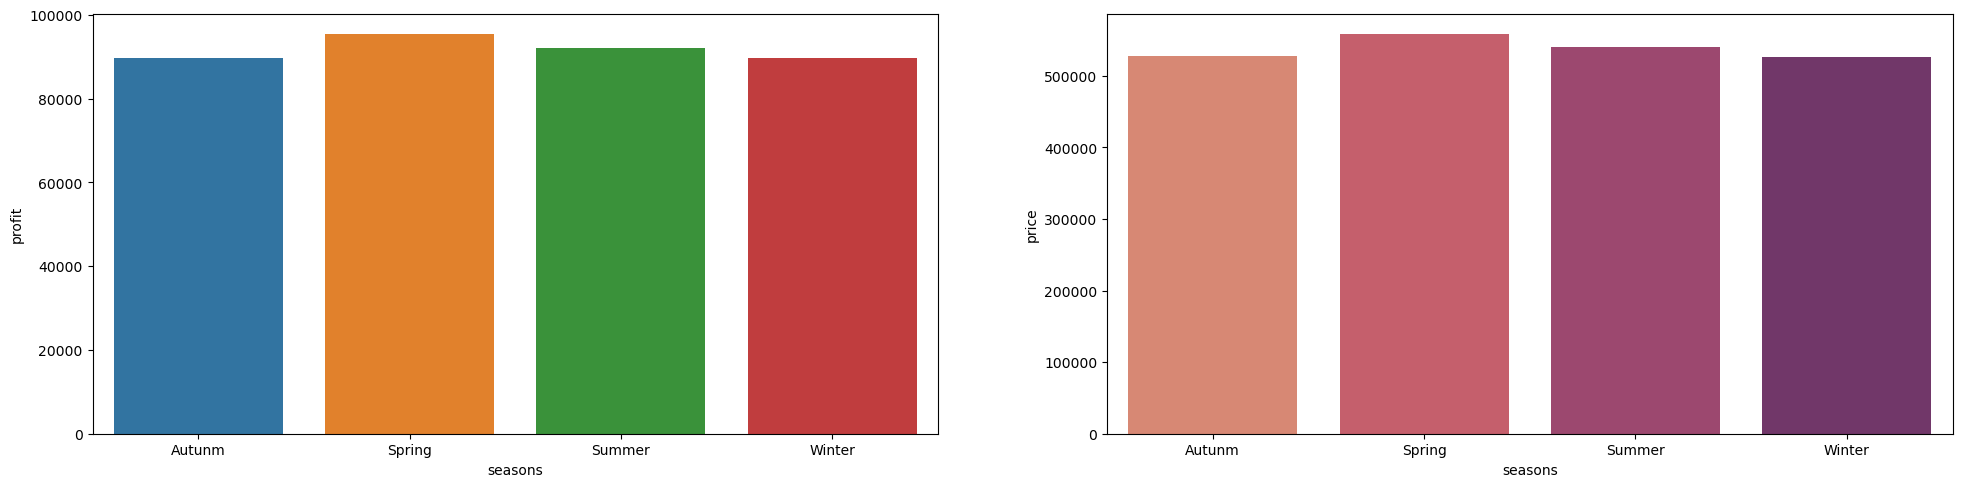

In [21]:

from matplotlib import gridspec

fig = plt.figure( figsize=(24, 12) )
specs = gridspec.GridSpec( ncols=2, nrows=2, figure=fig )


ax1 = fig.add_subplot( specs[1, 0] ) # First Row First Column
ax2 = fig.add_subplot( specs[1, 1] ) # Second Row First Column

# First Graph
df = df4[['seasons', 'profit']].groupby('seasons').mean().reset_index()
sns.barplot(x= df['seasons'], y= df['profit'], data=df, ax= ax1);

# # second Graph
df = df4[['seasons', 'price']].groupby('seasons').mean().reset_index()
sns.barplot(x= df['seasons'], y= df['price'], data=df, ax= ax2, palette= 'flare');

### Comparando os preços dos imóveis que tem vista para água e o que não tem 

,is_waterfront,price
0,no,450000.0
1,yes,1400000.0


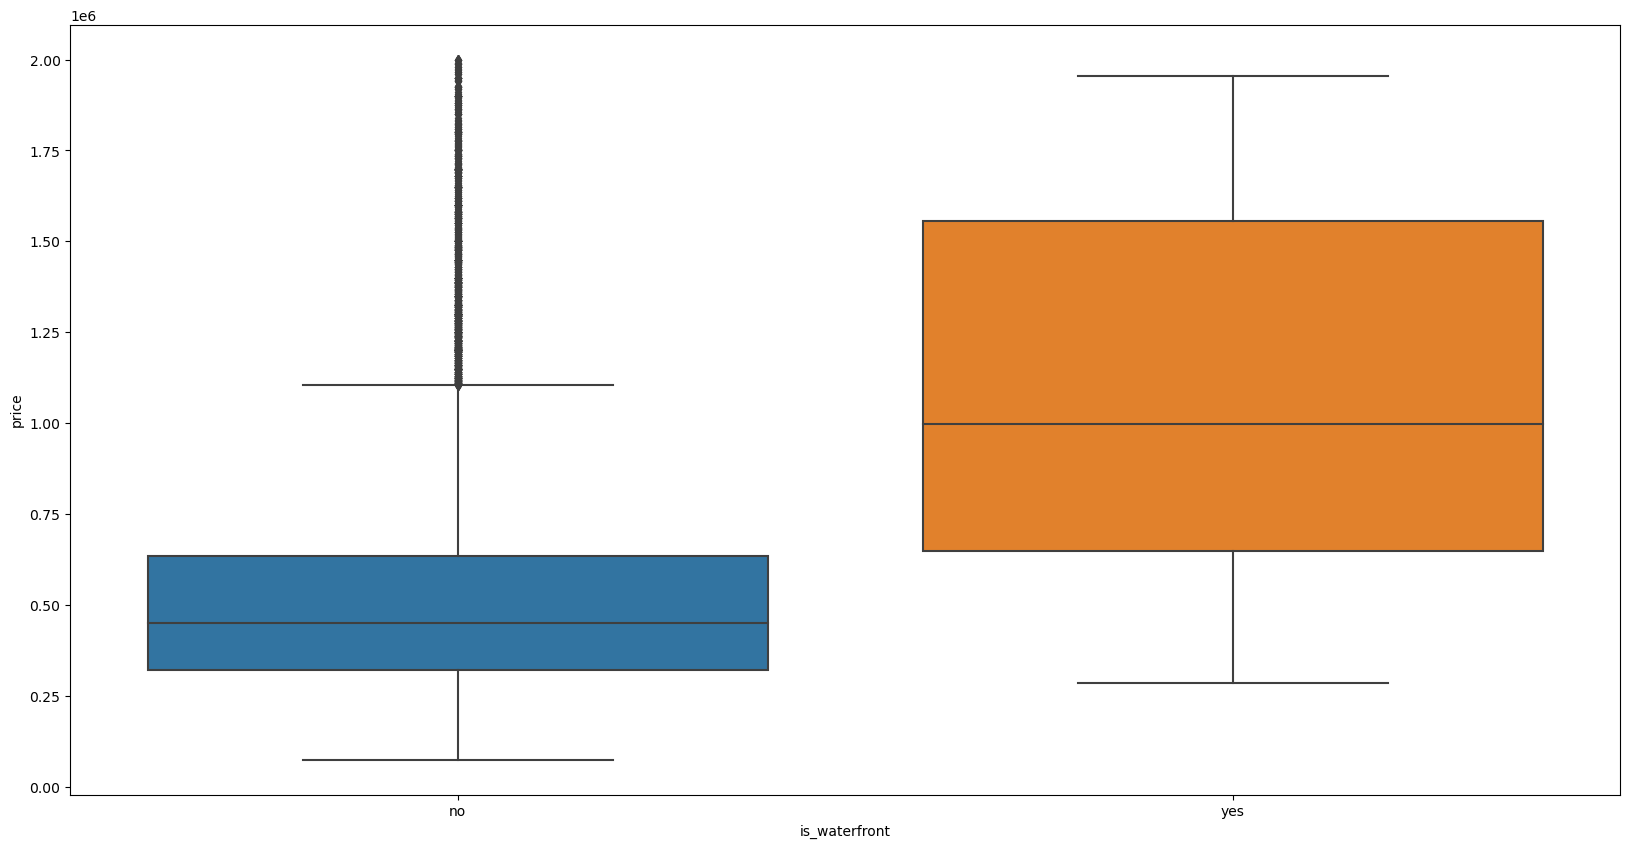

In [22]:
df4['is_waterfront'] = df4['waterfront'].apply(lambda x: 'yes' if x == 1 else 'no')

fig = plt.figure(figsize=(20,10))
sns.boxplot(data=df4[df4['price'] < 2000000], y='price', x='is_waterfront');
df4[['is_waterfront', 'price']].groupby('is_waterfront').median().reset_index()

### Verificando os preços das casa que foram reformadas 


,is_renovated,price
0,no,448087.5
1,yes,600000.0


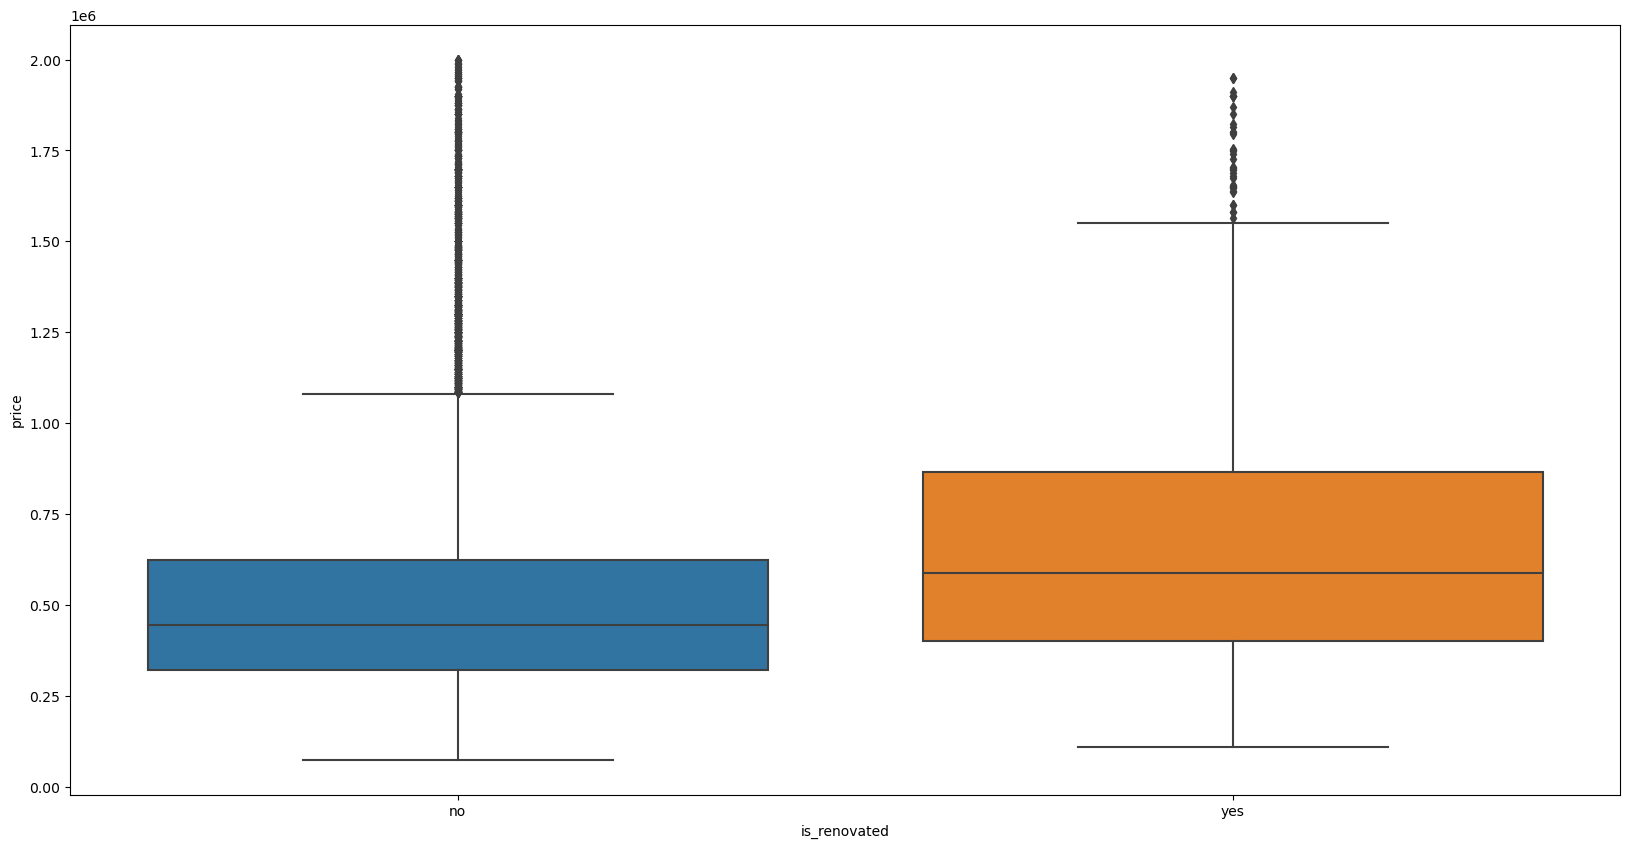

In [23]:

df4['is_renovated'] = df4['yr_renovated'].apply(lambda x: 'no' if x == 1900 else 'yes')


fig = plt.figure(figsize=(20,10))
sns.boxplot(data=df4[df4['price'] < 2000000], y='price', x='is_renovated');
df4[['is_renovated', 'price']].groupby('is_renovated').median().reset_index()

### Preço médio do imóvel por quantidade de pisos 

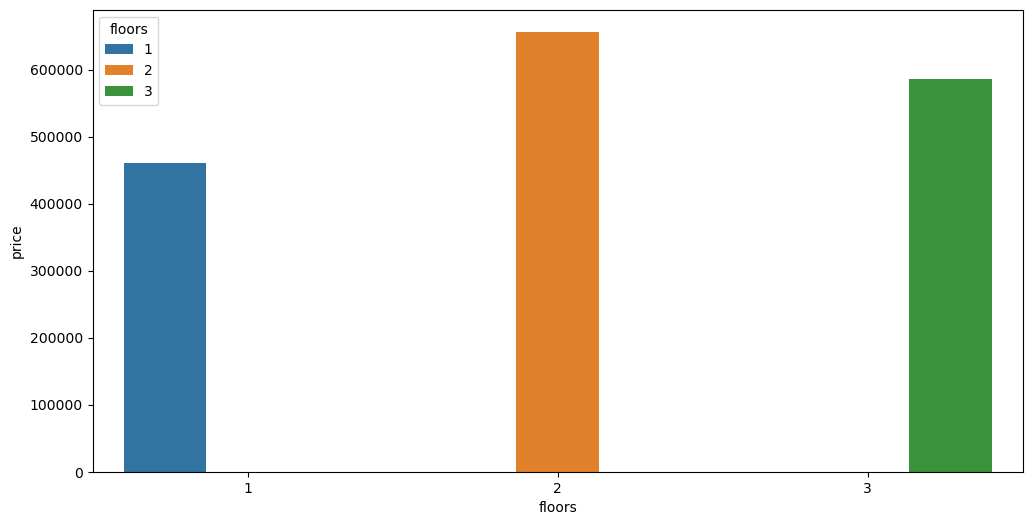

In [24]:
df4['floors'] = df4['floors'].apply(lambda x: 1 if x < 2 else 2 if x < 3 else 3).astype(int)
dfx = df4[['floors', 'price']].groupby('floors').mean().reset_index()
fig = plt.figure(figsize=(12,6))
#plt.style.use('ggplot')
#condition_order = [3,2,1]
sns.barplot(x='floors', y='price',hue='floors', data=dfx);


### Verificando a mediana dos preços de acordo com a condição da casa

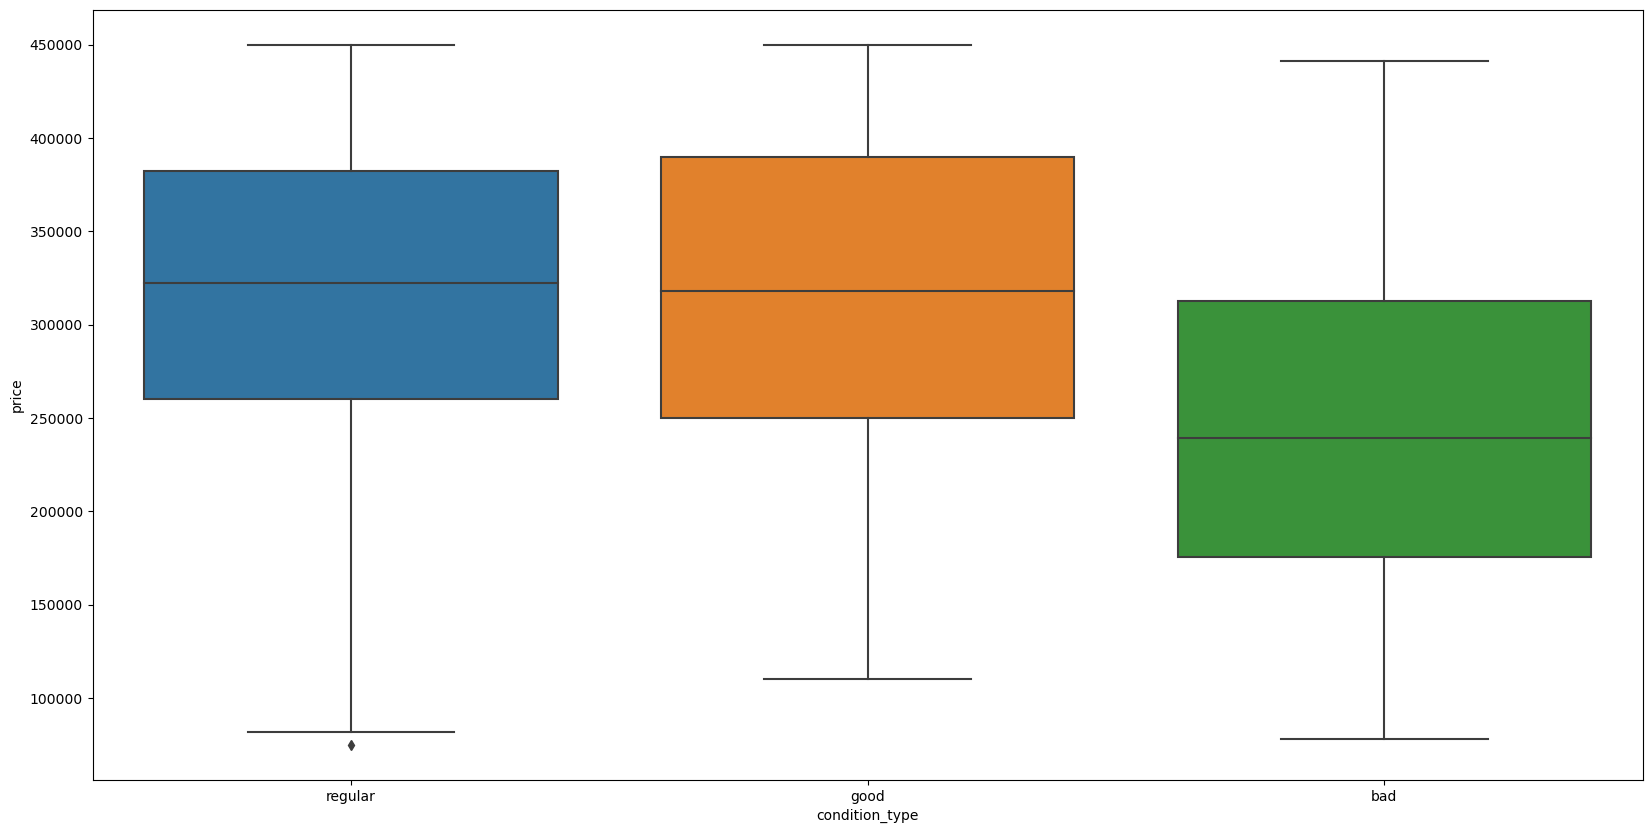

In [25]:
df4['condition_type'] = df4['condition'].apply(lambda x: 'bad' if x <= 2
                                                   else 'regular' if (x ==3) | (x==4)
                                                 else 'good')


fig = plt.figure(figsize=(20,10))
df4[['condition_type', 'price']].groupby('condition_type').median().reset_index()
sns.boxplot(data=df4[(df4['price'] < 450000.0)], y='price', x='condition_type');


### Arquivo com a sugestão dos valores de venda dos imóveis e com lucro de cada imóvel

In [26]:
file = df4[['id', 'zipcode', 'seasons', 'price_by_season', 'price', 'sell_price', 'profit']]

file.to_csv('sugestao_vendas_imoveis.csv')

### Insights da ánalise e exploração de dados 

### H1 - Imóveis com vista para água são mais valorizados em mais de  130 % 
Falso: A valorização é muito maior em torno de 212% dos imóveis com vista para água comparados ao imóveis sem vista, concluído que é bastante rentável comprar imóveis com vista para água  

0         NaN
1    2.124196
Name: difference, dtype: float64


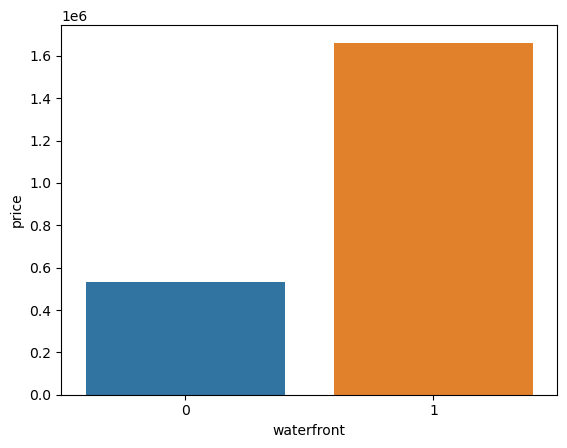

In [27]:
aux1 = df4[['price', 'waterfront']].groupby('waterfront').mean().reset_index()

aux1['difference'] = aux1['price'].pct_change()
print(aux1['difference'])
sns.barplot(x= 'waterfront', y= 'price', data = aux1);

### H2- Imóveis com mais de 2 pisos são mais valorizados em 50 % em relação os imóveis com únicos piso

Falso: Imóveis com mais de 2 pisos não tem o dobro de valorização comparado aos imóveis que só tem único pisco 
imóveis com maios de 2 pisos possui valorização média de 39% comparado aos imóveis com único piso

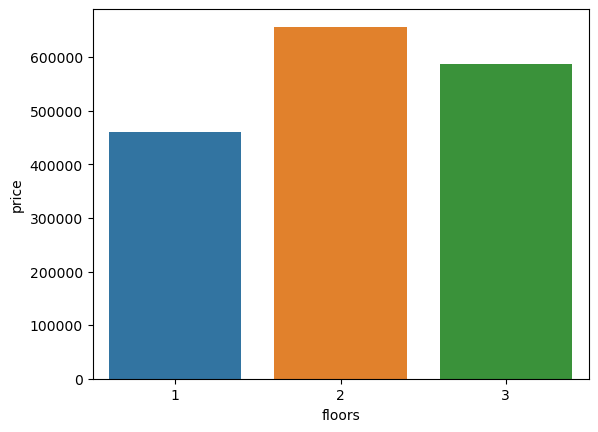

In [28]:
aux1 = df4[['price', 'floors']].groupby('floors').mean().reset_index()
sns.barplot(x= 'floors', y= 'price', data = aux1);

### H3 -Imóveis novos sem reforma são 20% mais caros que imóveis velhos reformados
False: Os imóveis novos sem reforma são 10% mais baratos que os imóveis velhos reformados , assim no momento de compra da House Rocket priorizar imóveis novos sem reforma 

0         NaN
1    0.090909
Name: difference_percentual, dtype: float64


C:\Users\mathe\AppData\Local\Temp\ipykernel_22140\3486568088.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux_houses['difference_percentual'] = df_aux_houses['price'].pct_change()


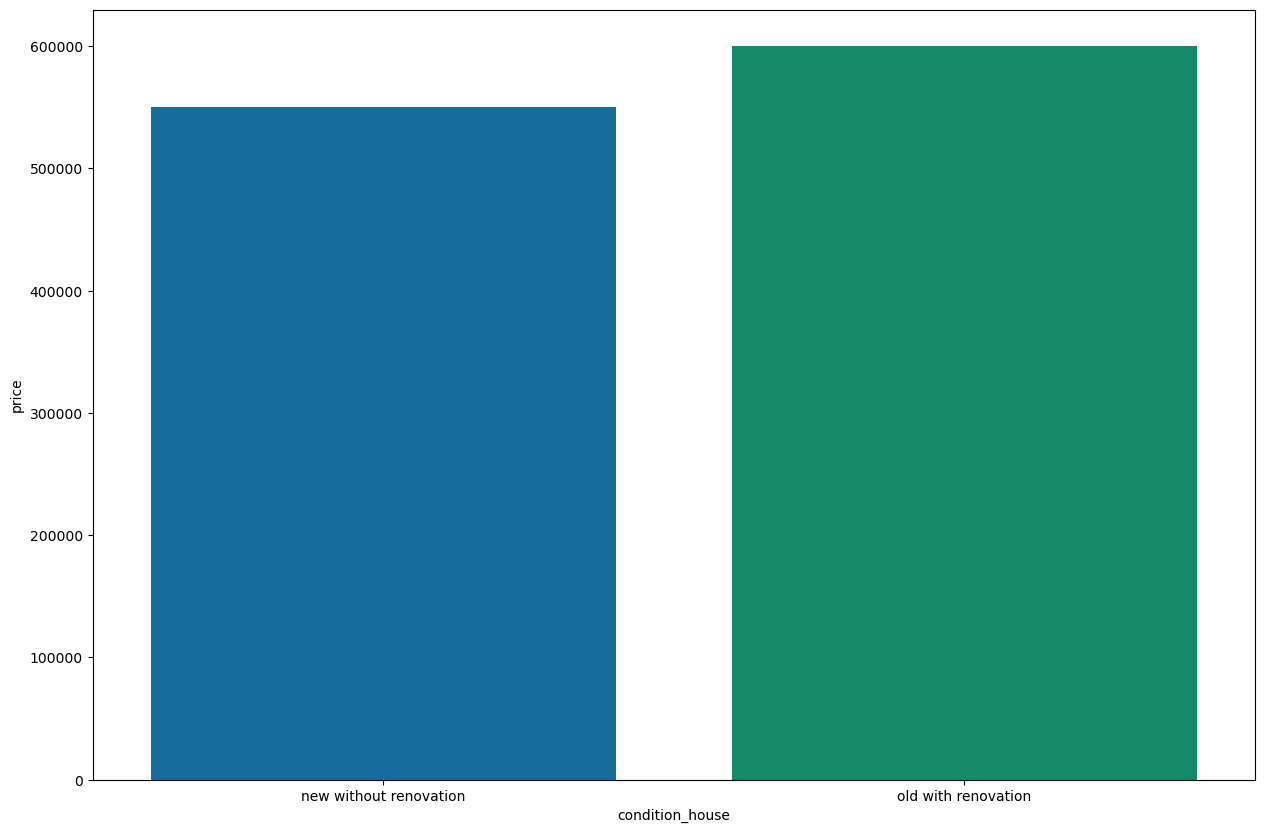

In [153]:
df_houses = df4.loc[((df4['is_renovated'] == 'no') & (df4['house_age'] == 'new'))  | ((df4['is_renovated'] == 'yes') & (df4['house_age'] == 'old')),['price', 'house_age']].groupby('house_age').median().reset_index()
df_houses['house_age'] = df_houses['house_age'].replace({'new': 'new without renovation','old': 'old with renovation'})
df_houses = df_houses.rename({'house_age': 'condition_house'}, axis=1)


fig = plt.figure(figsize=(15,10))
plt.style.use('seaborn-colorblind')
sns.barplot(x='condition_house', y='price', data=df_houses);

df_aux_houses = df_houses.head()
df_aux_houses['difference_percentual'] = df_aux_houses['price'].pct_change()

print(df_aux_houses['difference_percentual'])

### H4 - Imóveis com 3 ou mais Banheiros tem lucro de 50% a mais que imóveis que tem menos de 3 banheiros
Falso: Os imóveis com 3 ou mais Banheiros , são em torno de 25% mais lucrativo em média em comparação com imóveis que tem menos de 3 banheiros

       bathrooms         profit  difference_percentual
0  <3 bathrooms    89393.436174                    NaN
1  >=3 bathrooms  112425.985703               0.257654


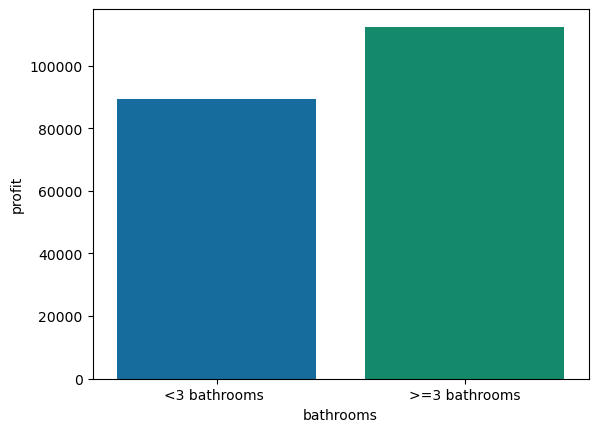

In [152]:
aux_bathrooms = df4[['bathrooms', 'profit']].copy()

aux_bathrooms['bathrooms'] = aux_bathrooms['bathrooms'].apply(lambda x: '<3 bathrooms ' if x < 3 else '>=3 bathrooms' )

aux_bathrooms1 = aux_bathrooms[['profit', 'bathrooms']].groupby('bathrooms').mean().reset_index()
aux_bathrooms1['difference_percentual'] = aux_bathrooms1['profit'].pct_change()
print(aux_bathrooms1)
sns.barplot(x = 'bathrooms', y = 'profit', data =aux_bathrooms1);

### H5 A estação do verão tem em média de lucro em 30% a mais em relação a todas outras estações 
Falso: A estação de verão tem em média lucro de 3% a mais em relação a todas outras estações

O ganho médio de no verão lucro em relação a outras estações é: 
 3.0 %  


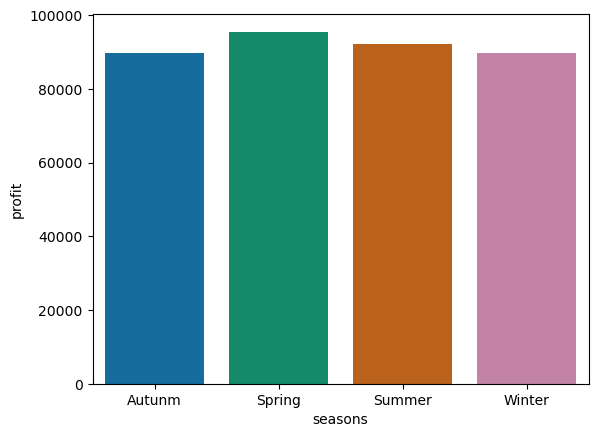

In [142]:
aux_seasons = df4[['seasons', 'profit']].groupby('seasons').mean().reset_index()
sns.barplot(x= aux_seasons['seasons'], y= aux_seasons['profit'], data= aux_seasons );

#aux_seasons_price = aux_seasons['profit'].pct_change()
#aux_seasons_price = aux_seasons_price * 100.0
aux_seasons_price = aux_seasons.loc[((aux_seasons['seasons'] == 'Autunm') | (aux_seasons['seasons'] == 'Summer')), ['profit']].pct_change().reset_index()

aux_seasons_price = list(aux_seasons_price['profit'])

aux_seasons_price_1 = aux_seasons.loc[((aux_seasons['seasons'] == 'Spring') | (aux_seasons['seasons'] == 'Summer')), ['profit']].pct_change().reset_index()

aux_seasons_price_1 = list(aux_seasons_price_1['profit'])

aux_seasons_price_2 = aux_seasons.loc[((aux_seasons['seasons'] == 'Winter') | (aux_seasons['seasons'] == 'Summer')), ['profit']].pct_change().reset_index()

aux_seasons_price_2 = list(aux_seasons_price_2['profit'])


aux_seasons_price_final = (aux_seasons_price + aux_seasons_price_1 + aux_seasons_price_2)

aux_seasons_price_final = [abs(x) for x in aux_seasons_price_final if np.isnan(x) == False]

#aux_seasons_price_final = [abs(item) for item in aux_seasons_price_final]

aux_seasons_price_final = round((sum(aux_seasons_price_final)/len(aux_seasons_price_final) * 100), 1)


# for item in aux_seasons_price_final:
#     if item != 'nan':
#         aux_seasons_price_final_calculo.append(item)


# for item in aux_seasons_price_1: 
#     if item != 'nan':
#         aux_seasons_price.append(item)

# for item in aux_seasons_price_2:
#     if item.isfloat():
#         aux_seasons_price.append(item) 

#aux_seasons_price_final = aux_seasons_price_final['']

print(f'O ganho médio de no verão lucro em relação a outras estações é: \n {(aux_seasons_price_final)} %  '.format(aux_seasons_price_final))

### Resultado financeiro seguindo as tomadas de decisões

In [178]:
aux1 = df4.loc[((df4['waterfront'] == 1) & (df4['floors'] >= 3)) & (((df4['seasons'] == 'Spring') | (df4['seasons'] == 'Summer')) & (df4['bathrooms'] >= 3 )), ['profit', 'id']]

aux1.reset_index().sort_values(by=['profit'], ascending= False).sum()

index     4.399000e+04
profit    4.440000e+05
id        5.172207e+09
dtype: float64